In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
PATH = '/content/drive/My Drive/Train Data.csv'
set_ = pd.read_csv(PATH)

In [4]:
set_.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:

set_ = set_.iloc[:, 1:2]

set_.shape
set_.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [6]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler(feature_range = (0, 1))
set_= mm.fit_transform(set_)

In [7]:
x_train = set_[0:1257]
y_train = set_[1:1258]

print(x_train.shape)
print(y_train.shape)

(1257, 1)
(1257, 1)


In [8]:
x_train = np.reshape(x_train, (1257, 1, 1))

print(x_train.shape)

(1257, 1, 1)


In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [10]:
model = Sequential()

# adding the input layer and the LSTM layer
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# adding the output layer
model.add(Dense(units = 1))

# compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fitting the RNN to the training data
model.fit(x_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
40/40 [==============================] - 1s 2ms/step - loss: 1.1776
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 1.0169
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.7964
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.6802
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 0.5737
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 0.4751
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.3775
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 0.3377
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 0.2664
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 0.2349
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 0.1892
Epoch 12/200
40/40 [==============================] - 0s 2ms/step - loss: 0.1720
Epoch 13/200
40/40 [=================

In [12]:
test_data = pd.read_csv('/content/drive/My Drive/Test Data.csv')
real_stock_price = test_data.iloc[:,1:2]
real_stock_price.head

<bound method NDFrame.head of       Open
0   778.81
1   788.36
2   786.08
3   795.26
4   806.40
5   807.86
6   805.00
7   807.14
8   807.48
9   807.08
10  805.81
11  805.12
12  806.91
13  807.25
14  822.30
15  829.62
16  837.81
17  834.71
18  814.66
19  796.86>

In [13]:
inputs = real_stock_price
inputs = mm.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))
predicted_stock_price = model.predict(inputs)
predicted_stock_price = mm.inverse_transform(predicted_stock_price)

In [14]:
predicted_stock_price

array([[771.5273 ],
       [778.4984 ],
       [776.8523 ],
       [783.4109 ],
       [791.1241 ],
       [792.1152 ],
       [790.1695 ],
       [791.627  ],
       [791.85767],
       [791.58624],
       [790.72235],
       [790.25146],
       [791.4709 ],
       [791.7016 ],
       [801.6727 ],
       [806.35   ],
       [811.4516 ],
       [809.5368 ],
       [796.6711 ],
       [784.5352 ]], dtype=float32)

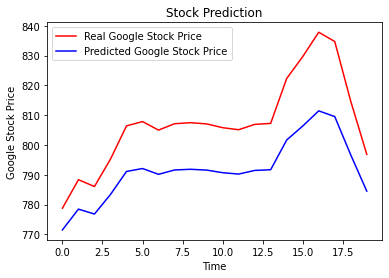

In [15]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [16]:
set_ = pd.read_csv('/content/drive/My Drive/Train Data.csv')

set_.shape
set_.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [17]:
set_ = set_.iloc[:, 1:2]
set_.shape
set_.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [18]:
predicted_stock_price = model.predict(x_train)
predicted_stock_price = mm.inverse_transform(predicted_stock_price)

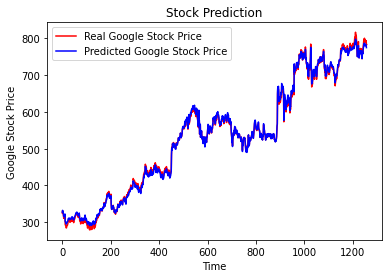

In [19]:
plt.plot(set_, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()